In [1]:
import pandas as pd
df=pd.read_csv("./data/car_data.csv")

In [2]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
current_year=2026
df["car_age"]=current_year-df["Year"]

In [4]:
df.drop(columns=["Year"], inplace=True)

In [5]:
df[["car_age"]].head()

,car_age
0,12
1,13
2,9
3,15
4,12


In [6]:
df.drop(columns=["Car_Name"], inplace=True)

In [7]:
df.columns

Index(['company', 'Selling_Price', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner', 'car_age'],
      dtype='object')

In [8]:
categorical_cols=["Fuel_Type", "Transmission", "Seller_Type"]

df=pd.get_dummies(
    df,
    columns=categorical_cols,
    drop_first=True
)

In [9]:
df['company'].value_counts()

company
honda            70
maruti suzuki    50
hyndai           50
other            39
toyota           36
bajaj            25
hero             15
yamaha            8
tvs               8
Name: count, dtype: int64

In [10]:
top_brands=df["company"].value_counts().head(5).index
top_brands

Index(['honda', 'maruti suzuki', 'hyndai', 'other', 'toyota'], dtype='object', name='company')

In [11]:
df["company_grouped"]=df["company"].where(
    df["company"].isin(top_brands),
    "Other"
)

In [12]:
df=pd.get_dummies(
    df,
    columns=["company_grouped"],
    drop_first=True
)

In [13]:
df.drop(columns=["company"], inplace=True)

In [14]:
df.select_dtypes(include="object")

""
0
1
2
3
4
...
296
297
298
299


In [15]:
X=df.drop(columns=["Selling_Price"])
y=df["Selling_Price"]

X.shape, y.shape

((301, 13), (301,))

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [18]:
lr=LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [19]:
y_pred_lr=lr.predict(X_test)

In [20]:
mae_lr=mean_absolute_error(y_test, y_pred_lr)
rmse_lr=np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr, rmse_lr

(1.1997208984177632, np.float64(1.8405089506768209))

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
rf=RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

In [23]:
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
y_pred_rf=rf.predict(X_test)

In [25]:
mae_rf=mean_absolute_error(y_test, y_pred_rf)
rmse_rf=np.sqrt(mean_squared_error(y_test, y_pred_rf))

mae_rf, rmse_rf

(0.6264122950819669, np.float64(0.9507929265299274))

In [26]:
feature_importance=pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.head(10)

Present_Price             0.881116
car_age                   0.058997
Kms_Driven                0.033266
Transmission_Manual       0.007386
company_grouped_honda     0.003869
Seller_Type_Individual    0.003325
company_grouped_toyota    0.003120
Fuel_Type_Petrol          0.002562
Fuel_Type_Diesel          0.002095
company_grouped_other     0.001902
dtype: float64

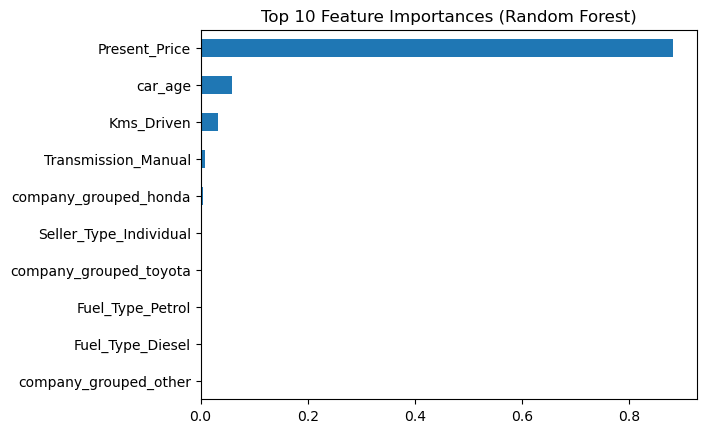

In [27]:
import matplotlib.pyplot as plt

feature_importance.head(10).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()

In [28]:
residuals=y_test-y_pred_rf

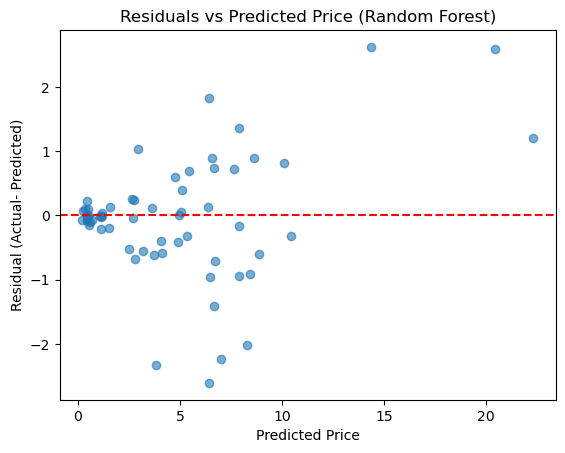

In [29]:
plt.scatter(y_pred_rf, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Price")
plt.ylabel("Residual (Actual- Predicted)")
plt.title("Residuals vs Predicted Price (Random Forest)")
plt.show()

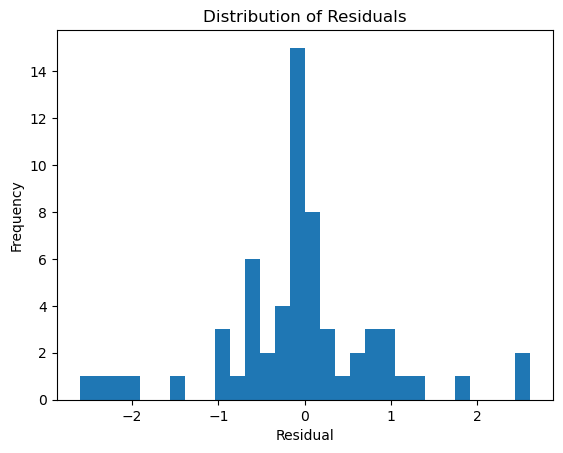

In [30]:
residuals.plot(kind="hist", bins=30)
plt.title("Distribution of Residuals")
plt.xlabel("Residual")
plt.show()

In [31]:
error_df=X_test.copy()
error_df["Actual"]=y_test
error_df["Predicted"]=y_pred_rf
error_df["Absolute_Error"]=abs(y_test-y_pred_rf)

error_df.sort_values("Absolute_Error", ascending=False).head(5)

,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Seller_Type_Individual,company_grouped_honda,company_grouped_hyndai,company_grouped_maruti suzuki,company_grouped_other,company_grouped_toyota,Actual,Predicted,Absolute_Error
97,18.64,8700,0,9,False,True,True,False,False,False,False,False,True,17.00,14.37940,2.62060
90,18.61,62000,0,17,False,True,True,False,False,False,False,False,True,3.80,6.40875,2.60875
82,25.39,15000,0,9,True,False,False,False,False,False,False,True,False,23.00,20.41240,2.58760
77,12.35,135154,0,22,False,True,False,False,False,False,False,False,True,1.50,3.82265,2.32265
57,18.54,50000,0,16,False,True,True,False,False,False,False,False,True,4.75,6.99345,2.24345
